In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.decomposition import KernelPCA

In [2]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

In [5]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.42258504 0.90632328]]
Объясненная дисперсия: [0.99046847]


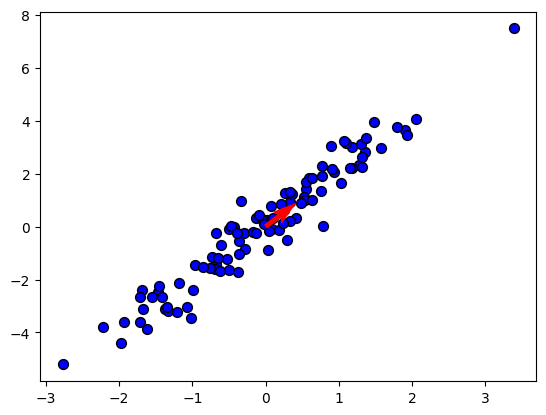

In [6]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

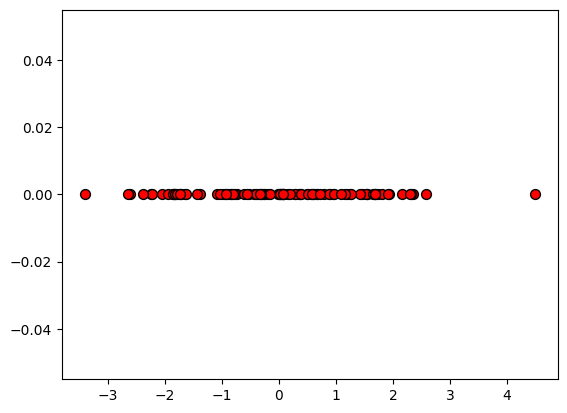

In [8]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [9]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

In [11]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [12]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


In [13]:
n_components_range = range(1, 31)
explained_variance = []

In [14]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

In [15]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


In [16]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [18]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[8.70632924 8.11312878]]


In [19]:
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [21]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

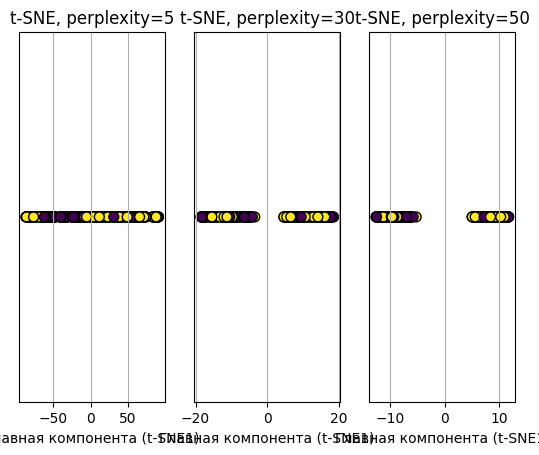

In [22]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

In [23]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

In [24]:
kernels = ['linear', 'poly', 'rbf']

In [25]:
for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

In [26]:
gamma_values = [0.1, 1, 10]